# Nexus -> CBF #
In this tutorial we will see how to export a Nexus archive produced by the Eiger detector from Dectris into a bunch of CBF files, similar to the one generated by Pilatus detectors, using the FabIO library to write images (and h5py which actually reads them).

**Nota:** HDF5 files produced by Eiger detector use specific plugins for reading/writing. They can be installed with `pip install hdf5plugin`.



In [1]:
#Run as first to set-up the plugin path, very important to handle Eiger data:
import os
import hdf5plugin

In [2]:
import fabio

In this example we will use the Eiger 4M dataset which can be obtained from Dectris: 
https://www.dectris.com/datasets.html. You may register to get download access.

In [3]:
images = fabio.open("collect_01_00001_master.h5")
print(images)

Eiger dataset with 1800 frames from collect_01_00001_master.h5


Each "EigerImage" object contains a list to the corresponding HDF5 opened with h5py.
So one can retrieve all metadata associated:

In [4]:
header = {}
for key, value in images.h5["entry/instrument/detector"].items():
    try:
        val = value[()]
    except:
        print("%s: unprintable"%key)
    else:
        print("%s: %s"%(key, val))
        header[key] = val
    

beam_center_x: 1051.0
beam_center_y: 1001.0
bit_depth_readout: 32
count_time: 0.099996
countrate_correction_applied: 0
description: b'Dectris Eiger 4M'
detectorSpecific: unprintable
detector_distance: 0.00733
detector_number: b'E-08-0102'
detector_readout_time: 3.78e-06
efficiency_correction_applied: 0
flatfield_correction_applied: 1
frame_time: 0.1
geometry: unprintable
pixel_mask_applied: 0
sensor_material: b'Si'
sensor_thickness: 0.00032
threshold_energy: 5635.65
virtual_pixel_correction_applied: 1
x_pixel_size: 7.5e-05
y_pixel_size: 7.5e-05


Now we can translate every single image into a CBF file, here we do only a dozen of then:

In [5]:
for idx, frame in enumerate(images):
    cbf = fabio.cbfimage.cbfimage(header=header,data=frame.data)
    fname = "collect_01_00001_%04i.cbf"%idx
    cbf.write(fname)
    print(fname)
    if idx>10: 
        break

collect_01_00001_0000.cbf
collect_01_00001_0001.cbf
collect_01_00001_0002.cbf
collect_01_00001_0003.cbf
collect_01_00001_0004.cbf
collect_01_00001_0005.cbf
collect_01_00001_0006.cbf
collect_01_00001_0007.cbf
collect_01_00001_0008.cbf
collect_01_00001_0009.cbf
collect_01_00001_0010.cbf
collect_01_00001_0011.cbf


This is how to display an image using the notebook backend: 

In [6]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


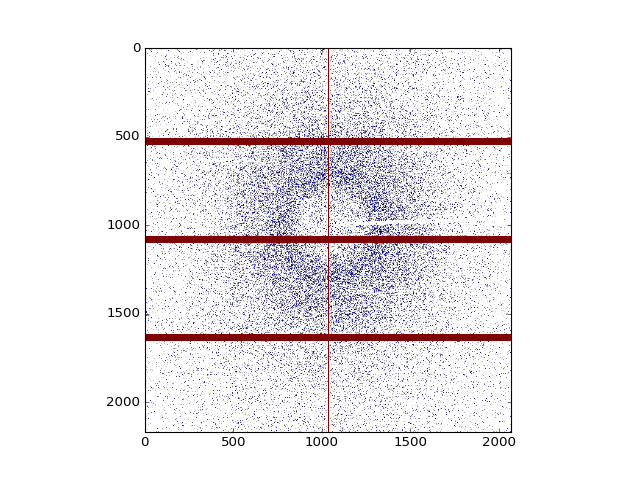

In [7]:
imshow(numpy.log(fabio.open("collect_01_00001_0010.cbf").data))

## Conclusion

FabIO offers a versatile way for manipulating image files and convert them.

In [8]:
#For info:
print(fabio.version)
print(fabio.eigerimage.h5py.version.version)
print(fabio.eigerimage.h5py.version.hdf5_version)

0.4.0-dev6
2.6.0
1.8.13
